In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference. The raw image is available in spicy.misc package with the name face.

Hint: <br>
import numpy as np <br>
from sklearn import cluster, datasets <br>
from scipy import misc <br>

In [1]:
import numpy as np
from sklearn import cluster, datasets
import scipy
from scipy import misc
import matplotlib.pyplot as plt
from time import time
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

In [2]:
racoon = misc.face(gray=True)
face = scipy.ndimage.zoom(racoon, 0.1) / 255.

graph = image.img_to_graph(face)

beta = 5
eps = 1e-5
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

N_REGIONS = 5

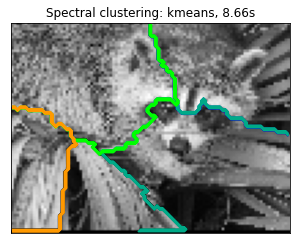

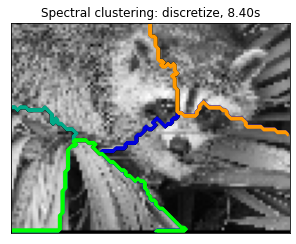

In [3]:
for assign_labels in ('kmeans', 'discretize'):
    start = time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS, assign_labels=assign_labels, random_state=1)
    end = time()
    labels = labels.reshape(face.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(face, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, colors=[plt.cm.nipy_spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (end - start))
    plt.title(title)
plt.show()

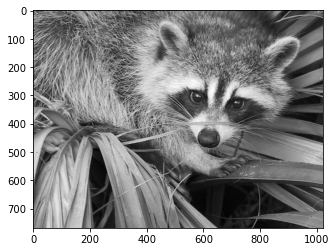

In [4]:
plt.imshow(racoon, cmap=plt.cm.gray);